In [1]:
#Import requests for web scraping
import pandas as pd
import requests as rq
import numpy as np
import collections

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib as mpl
import matplotlib.pyplot as plt

# import k-means from clustering stage
from PIL import Image 
from matplotlib import rcParams

print('Libraries installed')

Libraries installed


In [120]:
website_url= rq.get('http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S0188-46112002000300010').text #Bring the data from the target URL

In [121]:
#Import BeautifulSoup for html structure information from our request
from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')

data = [element.text for element in soup.find_all("p")] #Retrieving text from "p" founds
data = str(data) #Convert to string
data


'[\'\\n\\n\', \'Discurso de Nelson Mandela ante la Unión Geográfica Internacional con motivo de la presentación del Premio Planeta y Humanidad\', \'\\xa0\', \'Durban, 4 de agosto del 2002\', \'(Transcripción de discursos)\', \'Profesor Lindisizwe Magi:\', \'"A nombre de la Unión Geográfica Internacional, el Comité Nacional de Sudáfrica, y el Comité Organizador Local, la comunidad geográfica internacional y las comunidades geográficas Africana y Sudafricana -en particular los miembros del Comité nacional, Comisiones, Grupos de Estudios y fuerzas de trabajo de la IGU- es un honor darle la más cordial bienvenida, Madiba, al congreso regional IGU 2002, que constituye la reunión principal y más importante de académicos de la Geografía a nivel internacional. La IGU aprecia extremadamente el hecho de que usted haya encontrado un espacio en su muy ocupada agenda para acompañarnos el día de hoy, y se congratula de esta ocasión especial.\', \'Asimismo, la IGU celebra y se siente honrada por su d

# What are the Word Clouds ?

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.
For this task, we will be using the python library called 'word_cloud' developed by <b>Andreas Mueller</b>. <a hreef="https://github.com/amueller/word_cloud/">Here</a> you can find the repository and learn more about it.

In [116]:
!pip -q install wordcloud #Library for wordcloud

In [117]:
!pip -q install stop-words

In [122]:
from stop_words import get_stop_words #The words we want to ignore

stop_words_es = get_stop_words('es') #Spanish StopWords

In [123]:
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


In [132]:
stop_words = ["que", "la", "te", "y", "el", "El", "En", "La", "ha", "de", "De", "'\xa0'", "Y"] + stop_words_es #Adding aditional StopWords
#initiate world cloud object
test_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stop_words
)

# generate the word cloud
test_wc.generate(data)

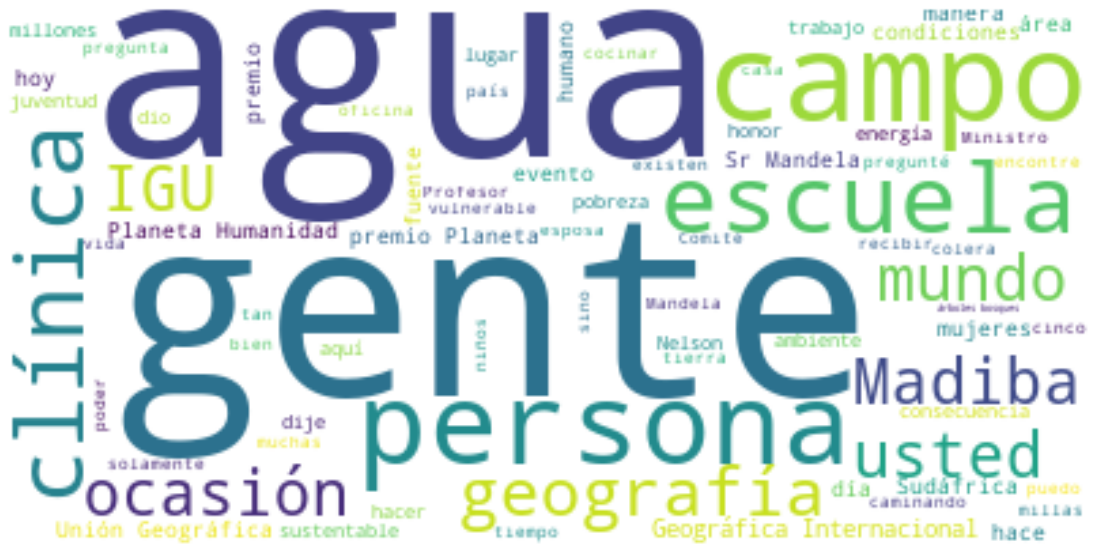

In [133]:
# display the word cloud
plt.imshow(test_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

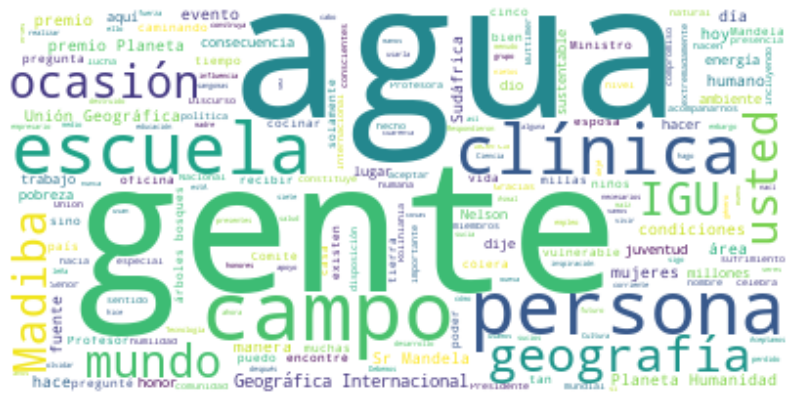

In [134]:
# re-generate the word cloud
test_wc.generate(data)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(test_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [135]:
!wget --quiet https://raw.githubusercontent.com/PhinanceScientist/AMLO_Wordcloud/master/test.png #OutMaskImage

# save mask to mx_mask
mx_mask = np.array(Image.open('test.png'))
    
print('Image downloaded and saved!')

Image downloaded and saved!


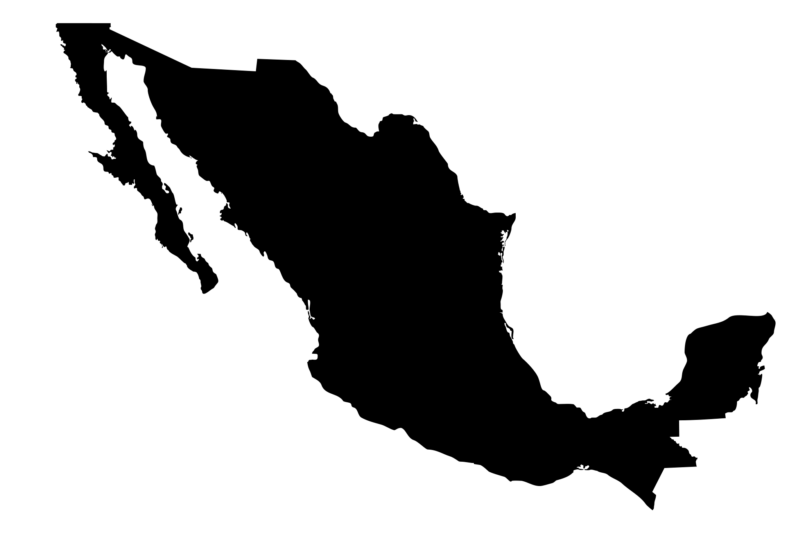

In [136]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(mx_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

Shaping the `word` cloud according to the mask is straightforward using `word_cloud` package. For simplicity, we will continue using the first 2000 words from the text.

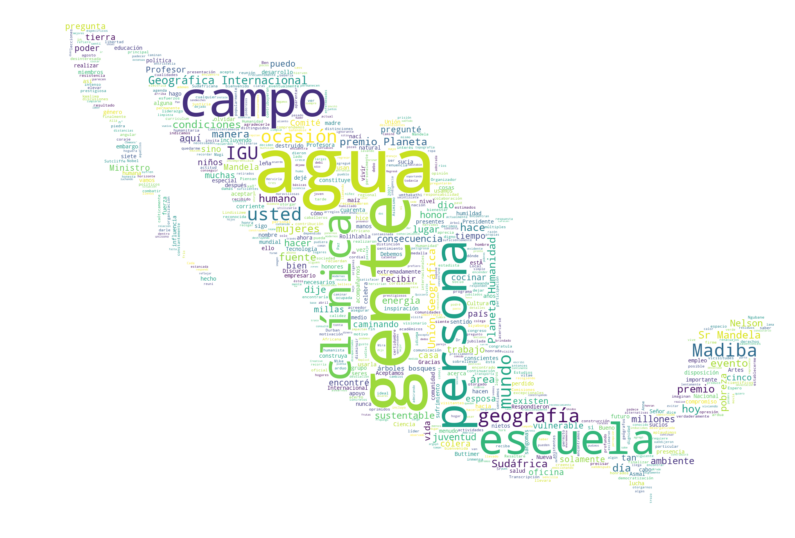

In [137]:
# instantiate a word cloud object
test_wc = WordCloud(background_color='white', max_words=2000, mask=mx_mask, stopwords=stop_words)

# generate the word cloud
test_wc.generate(data)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height


plt.imshow(test_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## Prepare the data for ploting and count the words

In [138]:
filtered_words = [word for word in data.split() if word not in stop_words]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(10):
    words.append(letter)
    counts.append(count)

<BarContainer object of 10 artists>

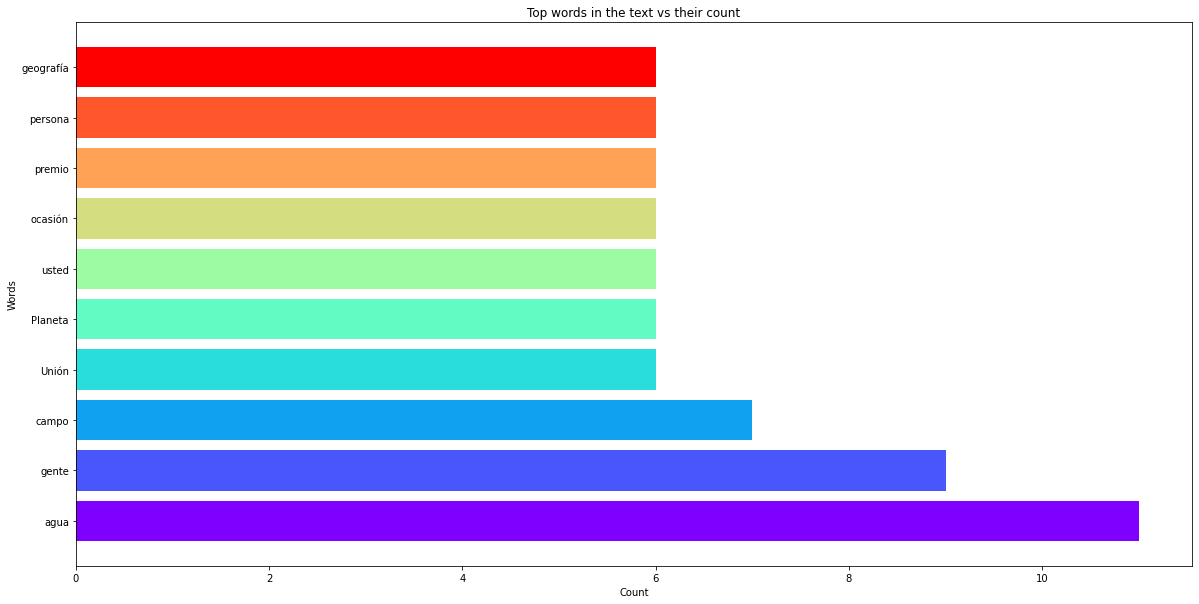

In [139]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the text vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)